**Ejercicios de Estadística Descriptiva I Pair | Modulo 3 - Leccion 9 | 28 noviembre 2025**

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'archivos\world_data_full_apply_nulos.csv',index_col=0)

### **Ejercicios estadística descriptiva**

En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos ejercicios. El ejercicio que os planteamos es:

Eres analista de datos en una organización internacional y quieres entender mejor la situación de los países a través de varios indicadores numéricos: población, esperanza de vida, fertilidad, PIB, emisiones, etc.

#### 1. Resumen básico de indicadores clave

Trabajaremos con estas variables numéricas:

* `population`
* `density`
* `life_expectancy`
* `fertility_rate`
* `gdp`

1. Calcula, para cada una de estas variables:
   * Media
   * Mediana
   * Desviación estándar
   * Mínimo
   * Máximo

In [11]:
df[['population','density', 'life_expectancy','fertility_rate', 'gdp']].agg(['mean','median','std','min','max']).T

,mean,median,std,min,max
population,3.335427e+02,2.150560e+02,2.964675e+02,1.008400e+01,9.735600e+02
density,1.345045e+02,8.300000e+01,1.573068e+02,1.265000e+00,8.470000e+02
life_expectancy,7.227968e+01,7.320000e+01,7.483661e+00,5.280000e+01,8.540000e+01
fertility_rate,2.698138e+00,2.245000e+00,1.282267e+00,9.800000e-01,6.910000e+00
gdp,4.772959e+11,3.438723e+10,2.172173e+12,4.727146e+07,2.142770e+13


2. Interpreta:
   * Elige dos variables y comenta si la **media y la mediana** están próximas o muy separadas.
   * ¿Qué te sugiere esto sobre la posible presencia de **valores extremos (outliers)**?

***

In [23]:
df[['density','fertility_rate']].agg(['mean','median']).T

,mean,median
density,134.504533,83.000
fertility_rate,2.698138,2.245


- Aquí podemos comprobar como hay una separación notable en la variable density entre media y mediana.
- Aquí podemos comprobar como hay una separación mínima en la variable fertility_rate entre media y mediana.

Lo vemos abajo con el coeficiente de desviación (mayor en la density):

In [25]:
df['density'].std()/df['density'].mean()*100

np.float64(116.95276761420716)

In [26]:
df['fertility_rate'].std()/df['fertility_rate'].mean()*100

np.float64(47.52415688879671)

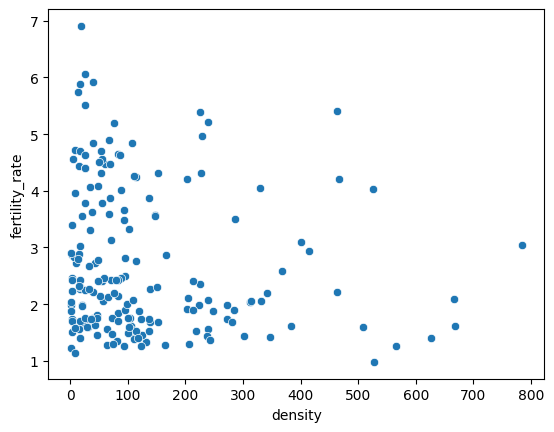

In [18]:
sns.scatterplot(data= df, x='density', y= 'fertility_rate');

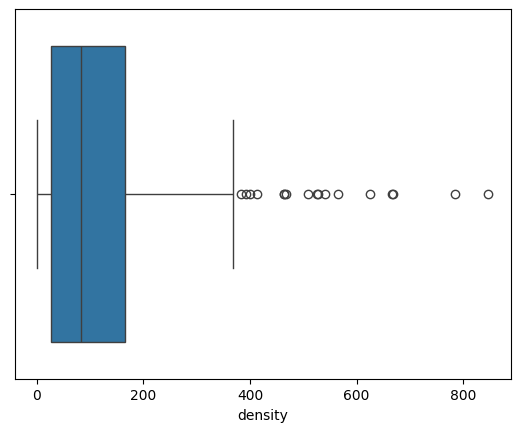

In [21]:
sns.boxplot(data= df, x='density');

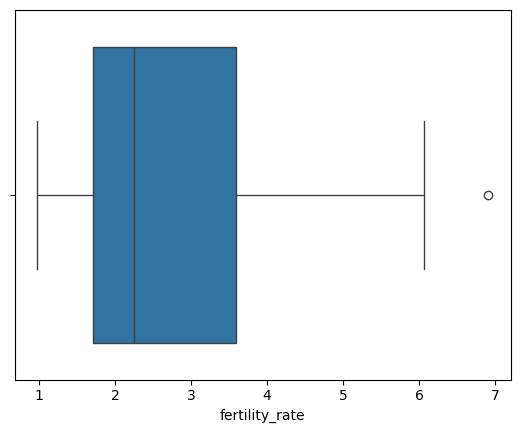

In [22]:
sns.boxplot(data= df, x='fertility_rate');

La variable density es la que contiene más outliers, esto se ve reflejado en la mayor "dispersión" de datos, es decir la desviación.

#### 2. Distribución y forma: esperanza de vida vs. fertilidad

Variables:

* `life_expectancy`
* `fertility_rate`

1. Para cada variable:
   * Muestra un **histograma**.
   * Calcula la **media** y la **mediana**.

In [32]:
df[['life_expectancy','fertility_rate']].agg(['mean','median']).T

,mean,median
life_expectancy,72.279679,73.200
fertility_rate,2.698138,2.245


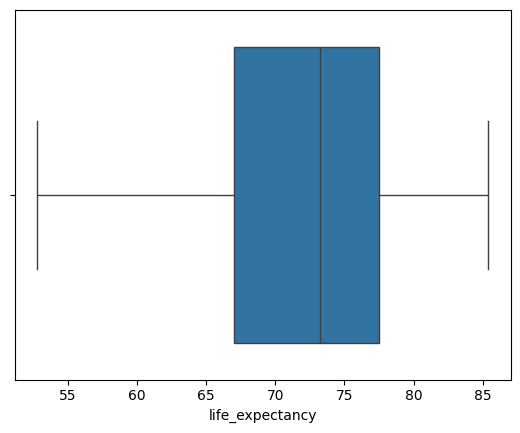

In [30]:
sns.boxplot(data= df, x='life_expectancy');

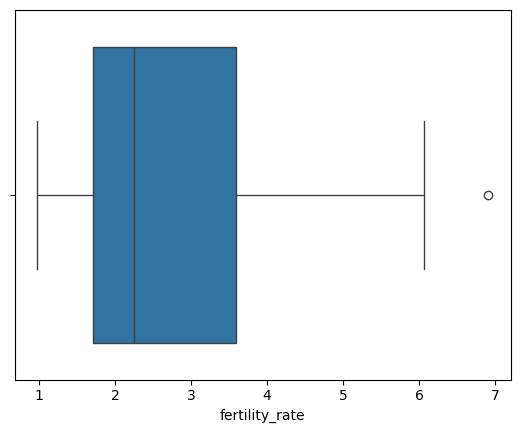

In [31]:
sns.boxplot(data= df, x='fertility_rate');

2. Interpreta:
   * ¿La distribución parece aproximadamente simétrica, sesgada a la derecha o a la izquierda?
   * ¿En cuál de las dos variables la media se ve más afectada por posibles valores extremos?
   * ¿En cuál te parece más “robusto” el uso de la mediana?

***

#### 3. Población total vs. densidad de población

Variables:

* `population`
* `density`

1. Calcula para ambas:
   * Media, mediana, desviación estándar.
2. Dibuja un **histograma** de `population` y otro de `density` (puedes usar escala logarítmica en el eje X si lo ves necesario).
3. Interpreta:
   * ¿Cuál de las dos variables parece más concentrada (menos dispersa)?
   * ¿Por qué no es lo mismo analizar `population` que `density` cuando comparamos países?

***

#### 4. Relación entre fertilidad y esperanza de vida (correlación numérica)

Variables:

* `fertility_rate`
* `life_expectancy`

1. Calcula el **coeficiente de correlación de Pearson** entre `fertility_rate` y `life_expectancy`.
2. Crea un **diagrama de dispersión** (scatter plot) con:
   * Eje X: `fertility_rate`
   * Eje Y: `life_expectancy`
3. Interpreta:
   * ¿La correlación es positiva o negativa? ¿Es fuerte, moderada o débil?
   * Describe, en lenguaje de negocio, qué significa esta relación:
     * “En general, los países con X tienden a tener Y…”.

***

#### 5. PIB, emisiones y población: ¿qué se relaciona con qué?

Variables:

* `gdp`
* `co2-emissions`
* `population`

1. Calcula una **matriz de correlación** solo con estas tres variables.
2. (Opcional) Representa la matriz en un **heatmap**.
3. Interpreta:
   * ¿Qué par de variables tiene la correlación más alta?
   * ¿Tiene sentido desde el punto de vista económico/medioambiental?
   * ¿Hay algún par con correlación muy baja (cerca de 0)? ¿Qué interpretación darías?

***

#### 6. Comparando grupos con medias y medianas: países más y menos ricos

Variable base:

* `gdp`

1. Calcula la **mediana** de `gdp` en el conjunto de datos.
2. Crea dos grupos de países:
   * `grupo_bajo_gdp`: países con `gdp` por debajo (o igual) de la mediana.
   * `grupo_alto_gdp`: países con `gdp` por encima de la mediana.
3. Para cada grupo, calcula la **media y la mediana** de:
   * `life_expectancy`
   * `infant_mortality`
4. Interpreta:
   * ¿En qué grupo la esperanza de vida es mayor, de media?
   * ¿En qué grupo la mortalidad infantil es más alta?
   * En lenguaje de políticas públicas, ¿qué conclusión preliminar podrías sacar de esta comparación simple?

***

#### 7. Bonus: variabilidad de la fuerza laboral

Variable:

* `population_labor_force_participation`

1. Calcula:
   * Media
   * Mediana
   * Desviación estándar
   * Percentiles 25, 50 y 75.
2. Interpreta:
   * ¿Está la participación en la fuerza laboral muy concentrada alrededor de un valor, o es bastante dispersa?
   * ¿Qué te indica la comparación entre los percentiles 25 y 75 sobre las diferencias entre países?

***

En todos los ejercicios, no te quedes solo en el “número”: añade siempre una **breve interpretación** en lenguaje natural, como lo haría un analista al presentar resultados a un equipo no técnico.